# Actividad 6: Redes neuronales.
## Aaron Arath Alvarado Anzaldua 1951187
## Jorge Axel Espronceda Rodríguez 1965626
## Jose Angel Salazar Willars 1913413
## Andrick Uriel Rosales Rodríguez 1953017
## Raymundo bautista reyes 2082326

## V1 5:00
## Grupo 007

#Cargar Librerias

In [ ]:
# Librerias
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Cargar Datos

In [ ]:
# Cargar Datos
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#Preprocesamiento de datos

Conocer con que datos estamos trabajando

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

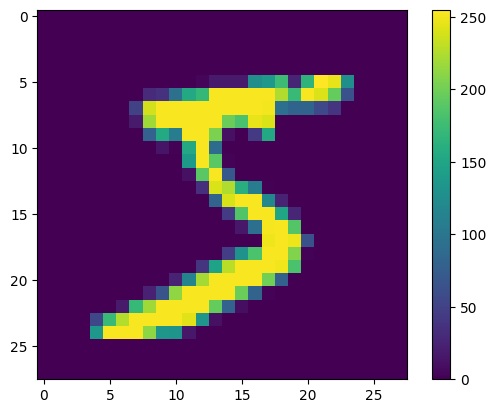

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

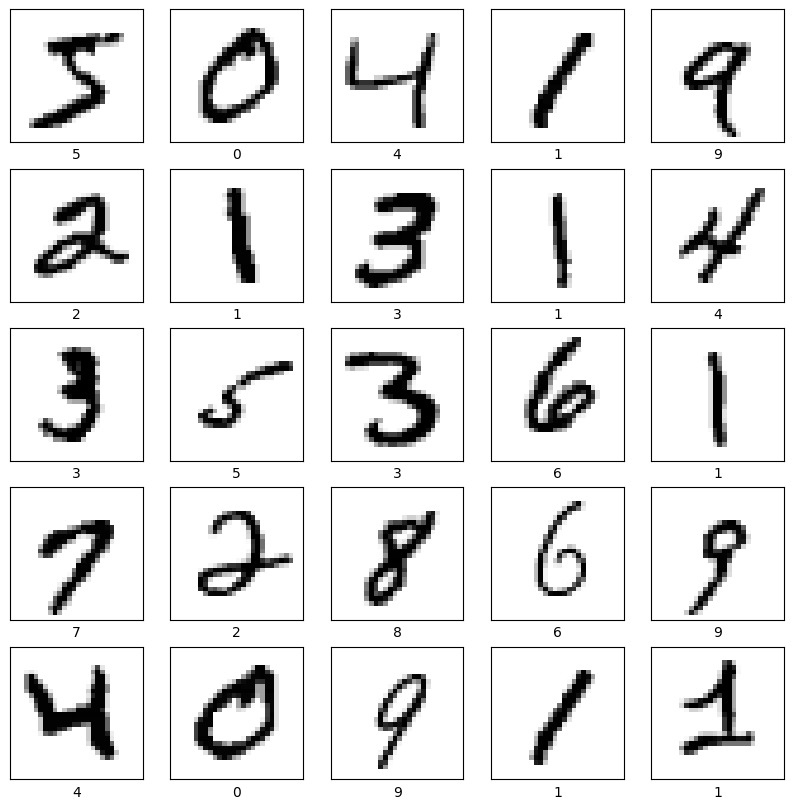

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Normalizar los pixeles entre un valor de 0 a 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Verificar si ya se normalizaron los datos con valor de 0 a 1

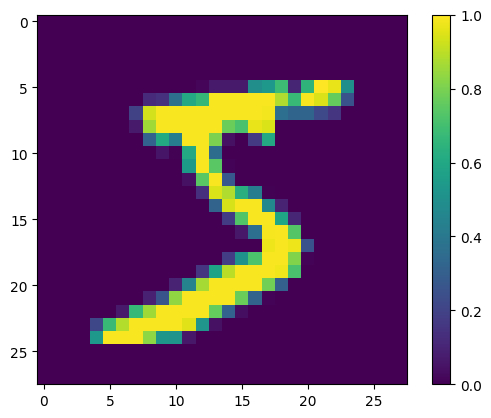

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Selección del y entrenamiento del modelo

Generar el modelo

Debemos destacar que el modelo es una red convolucional con una resolucion de imagen de 28 x 28 pixeles

In [ ]:
#Definir la arquitectura del Modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#Capa de salida con activacion softmax para 10 clases
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax')) # La función de activación en la capa de salida softmax.

Compilar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0310 - val_accuracy: 0.9920
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0376 - val_accuracy: 0.9915
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0468 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0449 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0403 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0433 -

# Evaluar el proceso de entrenamiento la exactitud (accuracy).

313/313 - 3s - loss: 0.0649 - accuracy: 0.9889 - 3s/epoch - 8ms/step

Exactitud en el conjunto de prueba: 0.9889000058174133


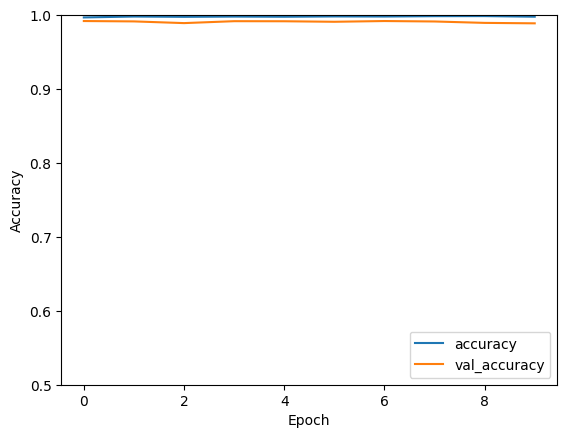

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nExactitud en el conjunto de prueba:', test_acc)

#Prueba del Modelo

In [ ]:
# Realizar predicciones con el conjunto de datos de prueba
predictions = model.predict(test_images)

# Mostrar 5 predicciones junto con sus valores reales
for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    print("Predicción:", predicted_label.numpy(), "| Valor real:", true_label)

313/313 [==============================] - 4s 13ms/step
Predicción: 7 | Valor real: 7
Predicción: 2 | Valor real: 2
Predicción: 1 | Valor real: 1
Predicción: 0 | Valor real: 0
Predicción: 4 | Valor real: 4


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

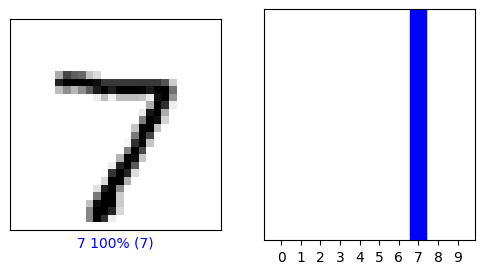

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

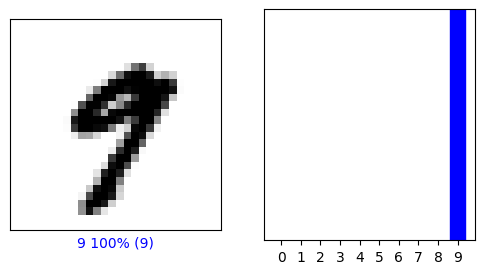

In [ ]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

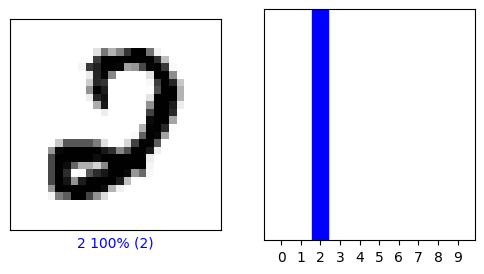

In [ ]:
i = 400
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

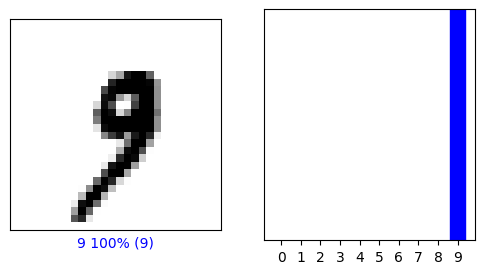

In [ ]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

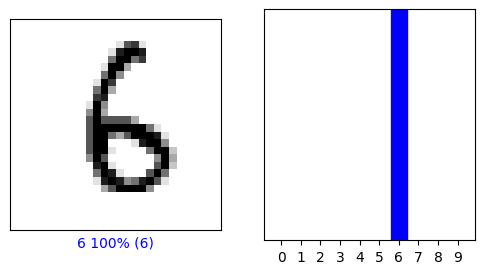

In [ ]:
i = 3000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Mas Predicciones

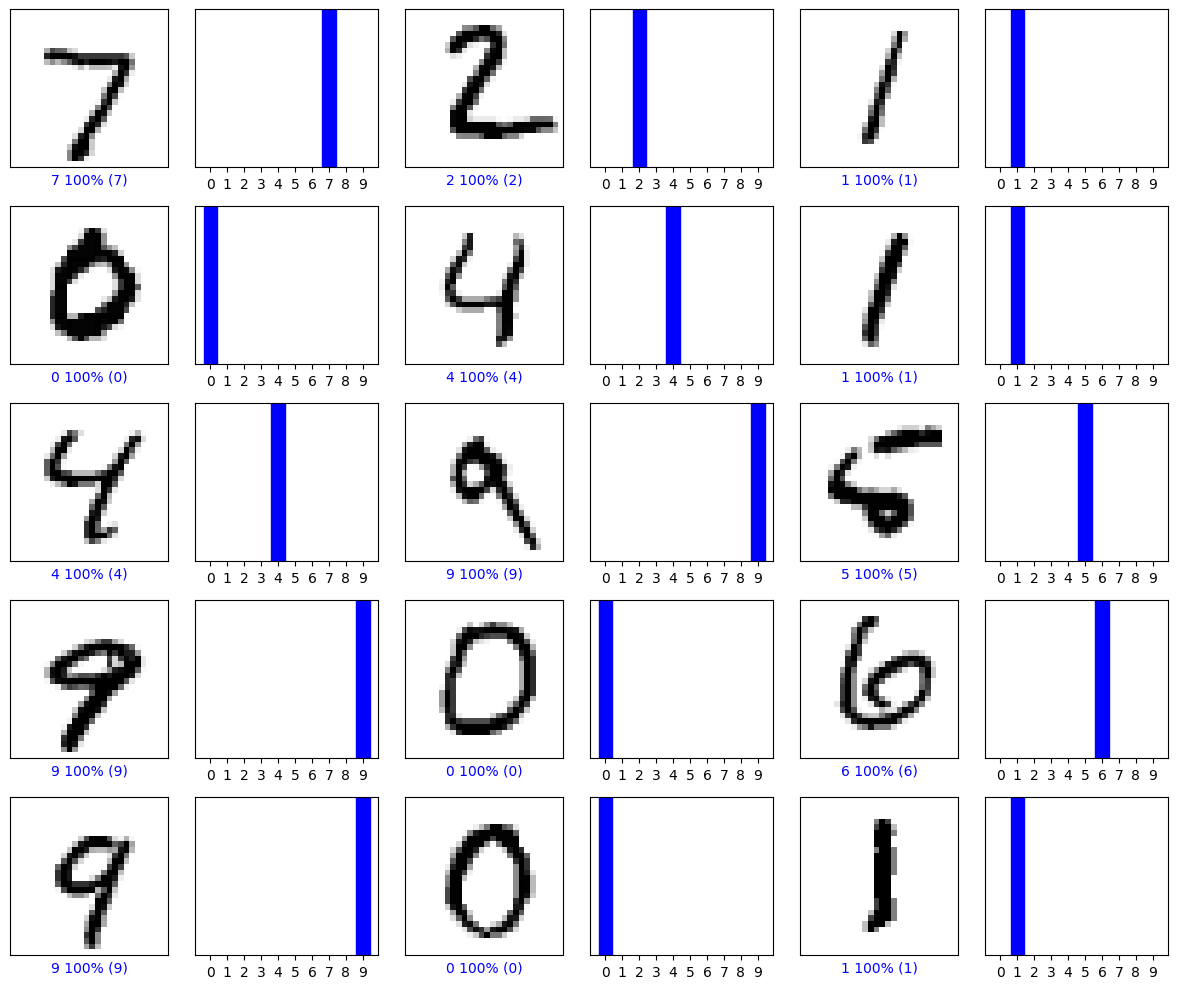

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Preguntas
##¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
Respuesta: En este caso, utilizamos las mismas épocas para entrenar el modelo, ya que la red neuronal convolucional (CNN) mostró una mejora significativa en las primeras épocas. Observé que desde la segunda época, el modelo casi no mejoró su rendimiento adicionalmente. Por lo tanto, elegir 10 épocas resultó ser excesivo para este caso específico. Esto sugiere que el modelo alcanzó rápidamente un punto de saturación en su aprendizaje, indicando que una menor cantidad de épocas era suficiente para lograr un buen rendimiento.






##¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
Respuesta: Obtuvimos un mejor rendimiento con este modelo de red neuronal convolucional (CNN) en comparación con el modelo de la actividad 5. Esto se debe a que las redes convolucionales están especialmente diseñadas para analizar y comprender imágenes. Las CNN utilizan capas de convolución y pooling que son capaces de extraer características importantes de las imágenes, como bordes, texturas y patrones, lo que mejora significativamente la capacidad del modelo para clasificar y reconocer imágenes con mayor precisión. En contraste, el modelo de la actividad 5 probablemente utilizaba una red neuronal completamente conectada (fully connected neural network), que no es tan eficiente para procesar datos espaciales como las imágenes.